# Beschrijvende statistiek

Statistiek is de techniek en wetenschap van het verzamelen en analyseren van numerieke data in grote hoeveelheden, met als doel inzicht te krijgen in een populatie op basis van een representatieve steekproef.

In deze notebook wordt beschrijvende statistiek behandeld, dit is een tak van statistiek waarbij data wordt beschreven of samengevat middels tabellen en figuren. Verder geeft beschrijvende statistiek inzicht in welke middelen en technieken je kan gebruiken om de data te analyseren, om er de juiste informatie uit te halen. Beschrijvende statistiek wordt niet gebruikt om voorspellingen te doen of voor het toetsen van een vraagstelling. 

De belangrijkste aspecten zijn centrummaten, spreidingsmaten, frequentieverdelingen en correlaties (ofwel relaties en verbanden). In deze notebook gaan jullie aan de slag met deze aspecten van beschrijvende statistiek, middels praktische opdrachten. De opdrachten aan het einde van de notebook toetsen jouw kennis van beschrijvende statistiek. 

In [50]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Centrummaten
Een eenvoudige manier om inzicht te krijgen in de data is om te kijken waar de data omheen gecentreerd is of waar de frequentie van datapunten het hoogste is. Er zijn drie verschillende centrummaten: de modus, mediaan en het gemiddelde. 

### 1.1 Modus

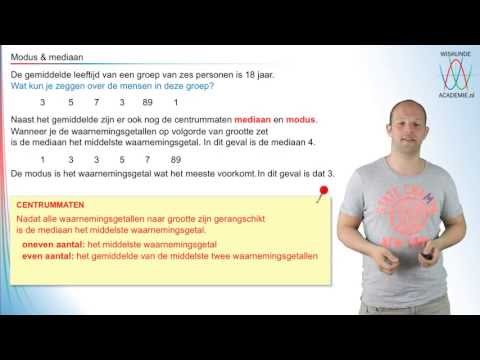

In [51]:
YouTubeVideo("-A7Oveo3TZI", width=800, height=500)

De modus is de waarde die het vaakst voorkomt in een rij met waarden. Je kan de modus gebruiken wanneer je dataset veel dezelfde waarden bevat en je de meest voorkomende wilt bepalen. Bekijk eens de volgende rij met waarden:

In [52]:
data_values = [1, 3, 2, 5, 7, 0, 2, 3, 3]

De modus is de meest voorkomende waarde, in dit geval het getal 3. Dit kunnen we makkelijk zijn: het getal 3 komt drie keer voor, de andere waarden komen minder dan drie keer voor. Hoe bepalen we de modus in Python?

In [53]:
# Als eerste extraheren we alle unieke waarden in deze lijst, zodat we kunnen bepalen hoeveel dit er zijn.

unique_values = set(data_values)

# We gebruiken een for loop om voor elk van de unieke waarden te bepalen hoe vaak ze voorkomen in de oorsprongelijke lijst.
# Als eerste definieren we een variabele waarin het aantal keer dat de waarde voorkomt in de lijst wordt opgeslagen.

max_count = 0

for item in unique_values:
    count = data_values.count(item)
    
# Met dit if statement wordt de max_count variabele overschreven wanneer de unieke waarde vaker voorkomt dan de vorige.
    if count > max_count:
        max_count = count
        mode = item

        
print(f"De modus van deze lijst is {mode}")

De modus van deze lijst is 3


Een eenvoudigere manier om de modus te bepalen is door gebruik van de scipy library.

In [54]:
from scipy import stats as st
print(st.mode(data_values))

ModeResult(mode=array([3]), count=array([3]))


C:\Users\nurta\AppData\Local\Temp\ipykernel_15108\1550199928.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(st.mode(data_values))


### 1.2 Mediaan

Als we alle waarden van onze lijst rangschikken op volgorde (bijv. van klein naar groot), dan is de mediaan de waarde die precies in het midden ligt. Wanneer de lijst een even aantal waarden heeft, wordt de mediaan berekend door de som te nemen van de middelste twee getallen en deze vervolgens de delen door twee. Zo ziet dat er uit in Python:

In [55]:
# Een lijst met het aantal huisdieren van elke collega

sample = [0, 1, 5, 7, 9, 10, 14]

# Een functie die de mediaan bepaald van een lijst met getallen.

def median(values):
    
# Als eerste wordt de lijst gerangschikt van klein naar groot
    ordered = sorted(values)
    print(ordered)
    
# Hier wordt het middelste getal bepaald wanneer de lijst oneven aantal waarden heeft.
# Bij een even aantal waarden, worden de twee middelste waarden bepaald.
    n = len(ordered)
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n/2)

# Het gemiddelde van de twee middelste waarden OF de middelste waarde wordt toegewezen. 
    if n % 2 == 0:
        return (ordered[mid] + ordered[mid+1]) / 2.0
    else:
        return ordered[mid]

print(median(sample))

[0, 1, 5, 7, 9, 10, 14]
7


Hier doen we dat met numpy. Dit is voornamelijk handig wanneer je met de pandas library werkt, aangezien kolommen met numerieke waarden in een pandas dataframe worden opgeslagen als numpy arrays:

In [56]:
import numpy as np

In [57]:
print(np.median(sample))

7.0


### 1.3 Het gemiddelde en het gewogen gemiddelde

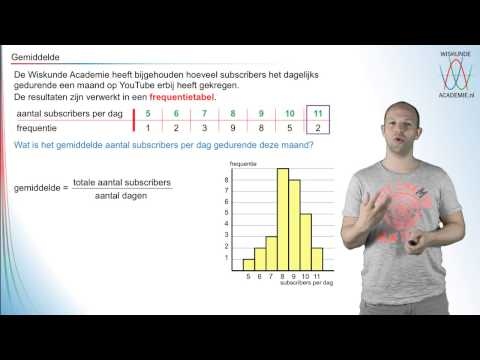

In [58]:
YouTubeVideo("a-WOEJ0iS10", width=800, height=500)

Het gemiddelde is de som van alle waarden gedeeld door het aantal waarden. In Python kunnen met behulp van de sum() en len() functies het gemiddelde als volgt bepalen:

In [59]:
sum_values = sum(data_values)
num_values = len(data_values)
mean = sum_values / num_values

print(f"Het gemiddelde van de lijst is {mean:.3f}")

Het gemiddelde van de lijst is 2.889


Het gemiddelde kan ook berekend worden met behulp van de numpy library.

In [60]:
mean = np.mean(data_values)

print(f"Het gemiddelde van de lijst is {mean:.3f}")

Het gemiddelde van de lijst is 2.889


Wanneer we het gemiddelde op deze wijze bepalen, stellen we dat elk datapunt even belangrijk is. Het kan zijn dat we meer waarde hechten aan sommige getallen in de lijst ten opzichte van andere. Stel: we hebben een lijst met toets scores van meerdere tussentoetsen en voor het eindcijfer telt een bepaalde toets score meer mee dan anderen. In dat geval kunnen we dit cijfer vermenigvuldigen met een factor, op basis van de waarde die we hechten aan die toets score, om zo meer 'gewicht' te geven aan dit cijfer. Het gewogen gemiddelde wordt berekend door elk datapunt (toets cijfer) te vermenigvuldigen met een factor, om vervolgens de som van de toets cijfers te delen door de som van de factoren:

In [61]:
# Drie toetsen met gewicht van 0.20 en een toets met 0.40
scores = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]

weighted_mean = sum(s * w for s,w in zip(scores, weights))


print(weighted_mean)

81.4


Hier wordt het gewogen gemiddelde berekend, met behulp van de numpy library:

In [62]:
scores = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]

weighted_mean = np.ma.average(scores, weights=weights)

print(f"Het gewogen gemiddelde van de toets scores is {weighted_mean}")

Het gewogen gemiddelde van de toets scores is 81.4


### 1.4 Wanneer gebruik je de modus, mediaan of het gemiddelde?

De modus geeft weer welke waarde het vaakst voorkomt, dit kan je gebruiken wanneer jouw dataset veel dezelfde data bevat. De keuze voor de mediaan of het gemiddelde is wat ingewikkelder en heeft te maken met de spreiding van de data. De mediaan gebruik je wanneer je veel of grote afwijkende waarden in je dataset hebt, omdat de mediaan minder gevoelig hiervoor is (de mediaan is het middelste waarde van een data reeks). Wanneer de data geen of weinig afwijkende waarden heeft, kan je het gemiddelde gebruiken. Dit is een afweging die je zelf moet maken.

Bekijk eens de verdeling van datapunten in de onderstaande afbeeldingen. Bij welke verdeling zou je kiezen voor de mediaan of voor het gemiddelde?

In [63]:
Image(url='https://brightspace.hhs.nl//content/enforced/15456-ADSAI-WISK1-22_2022_VT/Gaussian_distribution.png', width=600)
# mean

In [64]:
Image(url='https://brightspace.hhs.nl//content/enforced/15456-ADSAI-WISK1-22_2022_VT/Pareto_crop.png', width=600)
# mediaan

## 2 Spreidingsmaten

### 2.1 Variantie en standaard deviatie

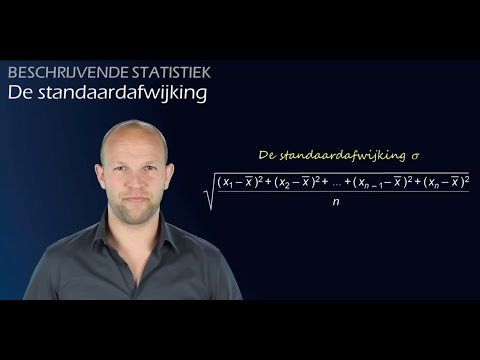

In [65]:
YouTubeVideo("dKughXxLjus", width=800, height=500)

Wanneer we data willen beschrijven, zijn we vaak ook geïnteressseerd in de verschillen tussen het gemiddelde en elk datapunt. Dit geeft ons een idee hoe de data verspreid is. Het berekenen van het verschil tussen elk datapunt en het gemiddelde is de eerste stap in het bepalen van de variantie. 

Stel, we hebben een dataset met het aantal huisdieren dat jouw collega's hebben:

In [66]:
import pandas as pd

In [67]:
# Een lijst met het aantal huisdieren van elke collega
data = [0, 1, 5, 7, 9, 10, 14]

# Met behulp van pandas maken we een dataframe
df = pd.DataFrame(data, columns=['Number of pets owned'])

In [68]:
display(df)

,Number of pets owned
0,0
1,1
2,5
3,7
4,9
5,10
6,14


We berekenen eerst het gemiddelde, waarna we deze van elk datapunt aftrekken.

In [69]:
test = df[:]
np.std(test)

Number of pets owned    4.62469
dtype: float64

In [70]:
# gemiddelde bepalen
mean_pets = np.mean(df['Number of pets owned'])
df['Difference from mean'] = df['Number of pets owned'] - mean_pets

display(df)

,Number of pets owned,Difference from mean
0,0,-6.571429
1,1,-5.571429
2,5,-1.571429
3,7,0.428571
4,9,2.428571
5,10,3.428571
6,14,7.428571


Dit verschil geeft ons een idee over de spreiding en hoe ver de datapunten van het gemiddelde afliggen. Zou er een manier zijn om deze verschillen samen te vatten in een enkel getal, om zo een beeld te krijgen van de spreiding?

Je zou misschien denken dat we het gemiddelde van de verschillen kunnen gebruiken, maar de positieve en negatieve getallen heffen elkaar op wanneer ze bij elkaar opgeteld worden. We zullen daarom eerst alle waarden kwadrateren (tot de macht 2), waarna we het gemiddelde berekenen, de waarde die hier uitkomt is de variantie. Deze geeft dus een beeld van de spreiding van de data. Hoe groter de variantie, des te groter de verschillen tussen de datapunten en het gemiddelde en daarmee zit er veel spreiding in de datapunten. Een kleinere waarde voor de variantie geeft dus het tegenovergestelde aan.

In [72]:
df['Squared difference from mean'] = np.square(df['Difference from mean'])
display(df)

variance = np.mean(df['Squared difference from mean'])
print(f"De variantie is {variance:.3f}")



,Number of pets owned,Difference from mean,Squared difference from mean
0,0,-6.571429,43.183673
1,1,-5.571429,31.040816
2,5,-1.571429,2.469388
3,7,0.428571,0.183673
4,9,2.428571,5.897959
5,10,3.428571,11.755102
6,14,7.428571,55.183673


De variantie is 21.388


Wellicht vraag je het jezelf al af: 'Wanneer is de variantie groot of juist klein?' Dit is een arbitraire eenheid en is afhankelijk van de waarden in jouw dataset. Om dit 'probleem' op te lossen, berekenen we de wortel van de variantie. Deze maat wordt de standaard deviatie genoemd. Het voordeel hiervan is dat de eenheid hetzelfde is als de data zelf en daarom is deze uitkomstmaat een stuk makkelijker te interpreteren. In de dataset die we gebruiken is de standaard deviatie dus het aantal huisdieren.

In [73]:
standard_dev = np.sqrt(variance)
print(f"De standaard deviatie is {standard_dev:.3f} huisdieren")

De standaard deviatie is 4.625 huisdieren


### 2.2 Spreidingsbreedte

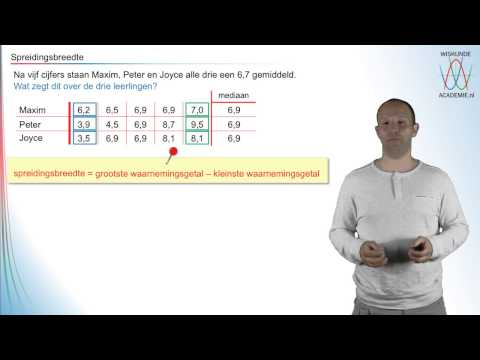

In [74]:
YouTubeVideo("tAJ2agzdEJE", width=800, height=500)

Een andere maat voor de spreiding van de data is spreidingsbreedte. Deze waarde is het verschil tussen de grootste en de kleinste waarde in de lijst. Kijk eens naar het voorbeeld met de huisdieren, wat is de spreidingsbreedte?

In [76]:
range_pets = max(df['Number of pets owned']) - min(df['Number of pets owned'])

print(f"De spreidingsbreedte is {range_pets} huisdieren")

De spreidingsbreedte is 14 huisdieren


### 2.3 Percentielen en kwartielen

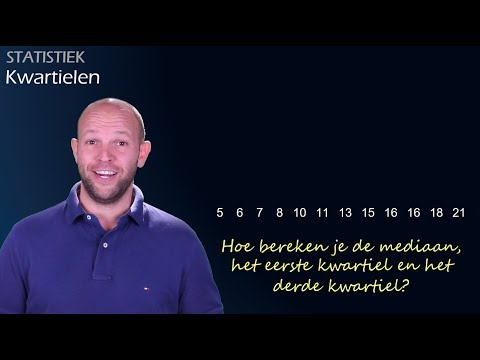

In [51]:
YouTubeVideo("998u9By6m_w", width=800, height=500)

Percentielen en kwartielen zijn, net als de variantie en standaard deviatie, een maat die de variatie en spreiding in de data weergeeft. Het bepalen van de kwartielen gaat vergelijkbaar als de mediaan. Orden de data in opeenvolgende waarden, kies vervolgens de middelste waarden (dit noemen we naast de mediaan ook wel Q2). Je houdt nu twee rijen aan waarden over, links en rechts van de mediaan. Kies nu nogmaals de middelste waarden (bedenk dat als je even getallen hebt, je de middelste twee waarden neemt en daar het gemiddelde van bepaald). Je dataset is nu in vieren gesplitst met daartussen Q1, Q2 en Q3, dit zijn de waarden die tussen de vier kwartielen liggen. Een maat voor de spreiding is de interkwartielafstand, dit is het verschil tussen het derde en het eerste kwartiel (Q3-Q1).

In [78]:
# Een functie die de kwartielen van een lijst bepaald

def quartiles(values):
    
    # First sort the values
    ordered = sorted(values)
    print(ordered)
    
    # Zoekt de index voor Q1 en Q3. Zie dat hier Q1 op 1/4e en Q3 op 3/4e van de lengte van de lijst staat.
    n = len(ordered)
    q1 = int(n / 4) - 1 if n % 2 == 0 else int(n/4)
    q3 = int(3*n / 4) - 1 if n % 2 == 0 else int(3*n/4)


    if n % 2 == 0:
        quart1 = (ordered[q1] + ordered[q1+1]) / 2.0
        quart3 = (ordered[q3] + ordered[q3+1]) / 2.0
    else:
        quart1 = ordered[q1]
        quart3 = ordered[q3]
        
    return quart1, quart3


# test2= [1, 2, 3, 4]
# displ= [-, -, -, -]

# print(quartiles(test2))

In [62]:
ages = [13,21,21,40,42,48,55,72]
print(quartiles(ages))

[13, 21, 21, 40, 42, 48, 55, 72]
(21.0, 51.5)


Een andere methode is het gebruik van de 'quantile' functie in numpy. Mogelijk zorgt dit voor iets andere waarden, vanwege de manier waarop numpy de kwartielen berekend.

In [63]:
print(np.quantile(ages, [0.25, 0.75]))

[21.   49.75]


Met het gebruik van percentielen wordt de data geschaald naar 0 tot 100. Zoek op hoe je percentielen kan bepalen middels Python.

## 3 Frequentieverdeling

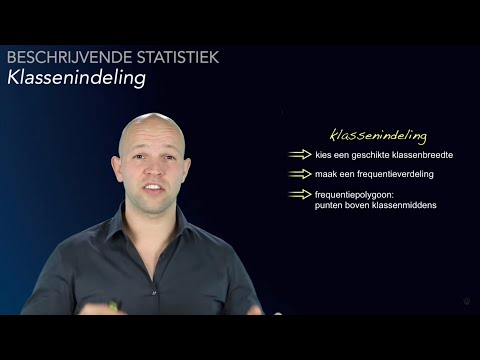

In [64]:
YouTubeVideo("_XsC7lYcocI", width=800, height=500)

Een handige manier om numerieke data te sorteren met behulp van klassenindeling om vervolgens de frequentie per klas te visualiseren is een histogram. In Python gebruiken we hier de pandas library voor.

We hebben een dataset met daarin de lengte van mensen in centimere:

In [94]:
heights_cm = [185.7, 172.3, 172.8, 169.6, 181.2, 162.2, 186.5, 171.4, 177.9, 174.5, 184.8, 163.6, 174.1, 
              173.7, 182.8, 169.4, 175.0, 170.7, 176.3, 179.5, 169.4, 182.9, 181.4, 179.0, 181.4, 171.9, 
              175.3, 170.4, 174.4, 179.2, 171.9, 173.6, 171.9, 170.9, 172.0, 175.9, 169.3, 177.4, 186.0, 
              180.5, 174.8, 170.7, 171.5, 186.2, 176.3, 172.2, 177.1, 188.6, 176.7, 179.7, 177.8, 173.9, 
              169.1, 173.9, 174.7, 179.5, 181.0, 181.6, 177.7, 181.3, 171.5, 183.5, 179.1, 174.2, 178.9, 
              175.5, 182.8, 185.1, 189.1, 167.6, 167.3, 173.0, 177.0, 181.3, 177.9, 163.9, 174.2, 181.0, 
              177.4, 180.6, 174.7, 174.8, 177.1, 178.5, 177.2, 176.7, 172.0, 178.3, 176.7, 182.8, 183.2, 
              177.1, 173.7, 172.2, 178.5, 176.5, 173.9, 176.3, 172.3, 180.2, 173.3, 183.3, 178.4, 179.6, 
              169.4, 177.0, 180.4, 170.3, 174.4, 176.2, 167.8, 177.9, 181.1, 170.8, 178.1, 168.1, 175.8, 
              166.3, 182.7, 178.5, 175.9, 171.3, 183.6, 187.8, 164.9, 183.4, 185.8, 178.0, 168.8, 181.2, 
              174.9, 172.4, 168.6, 179.3, 180.8, 172.3, 179.1, 169.1, 180.8, 176.3, 174.9, 175.4, 181.2, 
              180.5, 179.2, 176.8, 176.5, 179.7, 177.4, 180.1, 174.1, 161.4, 182.2, 189.1, 178.6, 175.4, 
              175.2, 175.3, 176.1, 169.3, 172.9, 170.0, 177.5, 174.2, 179.0, 175.0, 181.9, 177.3, 189.1, 
              164.6, 172.1, 181.4, 191.2, 174.5, 176.3, 174.6, 184.0, 174.3, 180.1, 174.1, 168.4, 177.9, 
              179.0, 183.8, 175.3, 172.3, 179.4, 177.4, 177.7, 175.6, 183.0, 178.2, 187.4, 182.7, 180.0, 
              166.2, 179.6, 178.5, 180.9, 182.3, 173.6, 180.9, 172.6, 187.7, 168.0, 165.4, 166.1, 170.7, 
              169.3, 187.7, 174.0, 167.9, 182.7, 172.5, 168.6, 181.3, 179.7, 173.4, 184.4, 176.8, 185.7, 
              179.0, 185.4, 176.7, 168.7, 190.7, 172.7, 174.8, 171.8, 174.8, 177.5, 177.2, 180.0, 186.8, 
              175.3, 168.6, 168.9, 172.0, 166.0, 181.0, 173.0, 174.1, 176.0, 167.6, 170.8, 180.0, 179.7, 
              173.3, 186.9, 168.2]

We maken hier een pandas dataframe van:

In [95]:
# Gebruik pandas om een dataframe te maken
df = pd.DataFrame(heights_cm, columns=['Height (cm)'])

Door de 'describe()' method te gebruiken, geeft pandas jouw beschrijvende statistiek van jouw dataframe:

In [96]:
df.describe()

,Height (cm)
count,250.000000
mean,176.459600
std,5.725257
min,161.400000
25%,172.425000
50%,176.500000
75%,180.175000
max,191.200000


We maken een histogram van onze data:

array([[<AxesSubplot:title={'center':'Height (cm)'}>]], dtype=object)

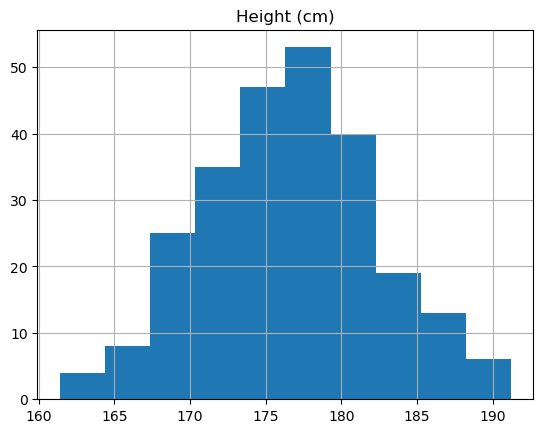

In [97]:
df.hist()

Deze visualisatie vertelt ons veel over de data. De spreidingsbreedte is tussen de 160 en 190 cm en de meeste mensen in onze dataset zijn tussen de 175 en 180 cm. Door de klassenindeling te veranderen kunnen we in- en uitzoomen op onze histogram. Dit doen we door 'bins' als argument toe te voegen aan de 'hist()' method, deze staat standaard op 10.

array([[<AxesSubplot:title={'center':'Height (cm)'}>]], dtype=object)

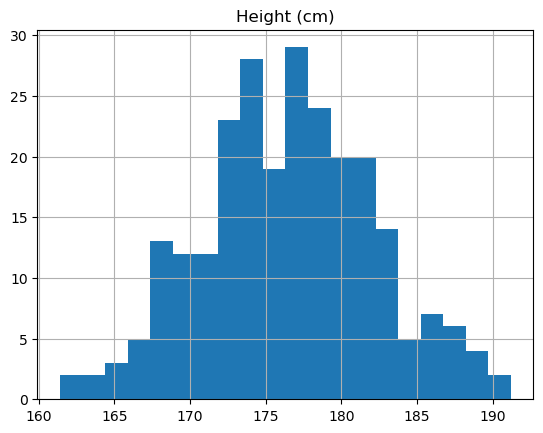

In [103]:
df.hist(bins=20)

## 4 Meetniveau's

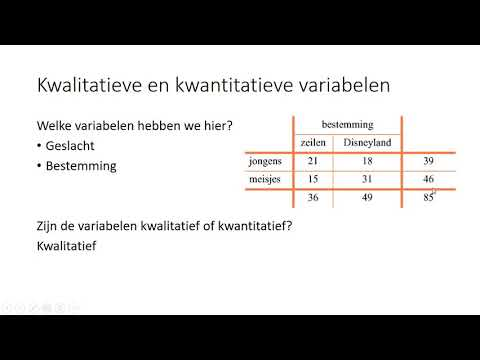

In [104]:
YouTubeVideo("3-9IdeVVIik", width=800, height=500)

## 5 Correlaties

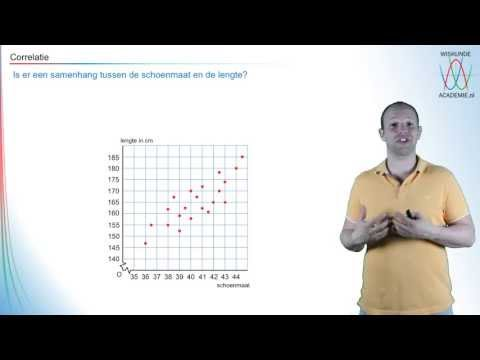

In [106]:
YouTubeVideo("FvZw74gz0Aw", width=800, height=500)

Correlatie is een statistische maat die weergeeft in welke mate twee variabele een lineair verband hebben. Het is een methode die wordt gebruikt om verbanden en relaties te beschrijven, zonder uit te gaan van causaliteit. 

Je kan wiskundig bepalen wat het verband is tussen twee variabelen, door de (Pearson) correlatie coëfficiënt te bepalen. Deze kan een waarde aannemen tussen de -1 en 1. Een positieve waarde dichtbij 1 houdt in dat er een sterke en positieve relatie is tussen de twee variabelen, ofwel wanneer de ene variabele stijgt, stijgt de ander ook. Andersom staat een negatieve waarde voor een negatief verband (als de een stijgt, daalt de ander). Hoe dichter de waarde bij de 0 komt, des te zwakker het verband is. In Python kan je de method 'corr()' binnen de numpy library gebruiken om de correlatie coëfficient te bepalen. Je kan ook 'df.corr()' gebruiken wanneer je een pandas dataframe hebt.

Kijk maar eens naar dit voorbeeld:

In [107]:
x = np.arange(10, 20) # a list of values from 10 to 20
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# Het gebruik van pandas om een dataframe te maken
df = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])

# Bepalen van de correlatiecoëfficiënt
df.corr()

,x,y
x,1.00000,0.75864
y,0.75864,1.00000


Elk element op de diagonaal geeft het verband die de variabele met zichzelf heeft weer. Logischerwijs is dit altijd 1. De overige waarden geven de verbanden aan tussen verschillende variabelen. Een waarde van 0.75 is dichtbij 1, deze variabelen hebben dus een sterke positieve relatie met elkaar. We gaan dit nu visualiseren:

<AxesSubplot:xlabel='x', ylabel='y'>

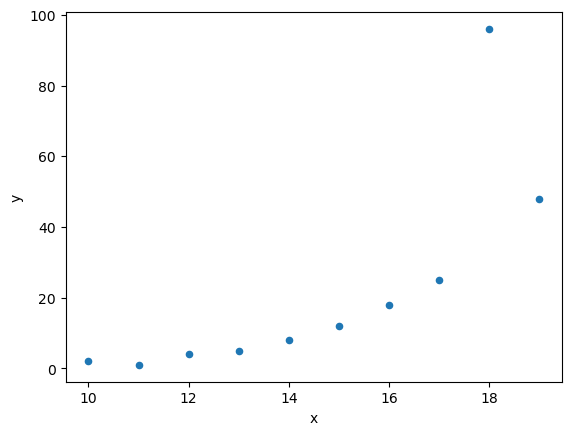

In [108]:
df.plot.scatter('x', 'y')

Zie je de positieve correlatie?

Waarschuwing! Dat twee variabelen een positief verband hebben, houdt niet in dat er een causaal verband bestaat. [Deze website](https://www.tylervigen.com/spurious-correlations) laat een aantal grappige voorbeelden zien van variabelen die een sterk verband hebben, maar niks met elkaar te maken hebben.

Een waarschuwing over het vertrouwen van beschrijvende statistiek:

Beschrijvende statistiek kan een krachtig hulpmiddel zijn om meer te weten te komen over jouw data, maar je kan op basis hiervan niet blindelings conclusies trekken. Als voorbeeld kijken we naar vier datasets hieronder. Ze hebben allemaal dezelfde beschrijvende statistiek (gemiddelde, variantie, correlatie), maar de verschillen die je ziet zijn erg groot.

In [109]:
Image(url="https://brightspace.hhs.nl//content/enforced/15456-ADSAI-WISK1-22_2022_VT/Anscombe's_quartet.png", width=600)

Een ander leuk voorbeeld: een dataset waarbij de data punten een vorm hebben van een dinosaurus en een dataset van een cirkel, met dezelfde beschrijvende statistiek!

![DinoUrl](https://brightspace.hhs.nl//content/enforced/15456-ADSAI-WISK1-22_2022_VT/dinosaur_circle.gif "dinosaur")

Het is daarom belangrijk om **altijd je data te visualiseren** voordat je conclusies trekt. De combinatie van visualisaties en het toepassen van beschrijvende statistiek noemen we **'exploratory data analysis'** (het verkennen van de data).

## 6 Opdrachten

Het is tijd om alles wat je hebt geleerd toe te passen. De dataset bevat gegevens over inkomsten en uitgaven van huishoudens. Het is aan jou om statistische methoden toe te passen om de dataset te beschrijven. Importeer de dataset en beantwoord de vragen in de daarvoor bestemde vakken.

In [170]:
import pandas as pd

In [171]:
income_df = pd.read_csv("Inc_Exp_Data.csv")

In [172]:
income_df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


### Vraag 1: Wat is de gemiddelde uitgave per huishouden?

In [177]:
avg_exp = income_df.Mthly_HH_Expense.mean()
print(f"De gemiddelde uitgave per huishouden is = {avg_exp}")

De gemiddelde uitgave per huishouden is = 18818.0


### Vraag 2: Wat is de mediaan van de uitgaven per huishouden

In [178]:
med_exp = income_df.Mthly_HH_Expense.median()
print(f"De median van de uitgaven per huishouden is = {med_exp}")

De median van de uitgaven per huishouden is = 15500.0


### Vraag 3: Welke van de twee centrummaten zou jij gebruiken voor de maandelijkse uitgaven per huishouden?

Ik zou de median(15500.0) gebruiken.
De gemiddelde(18818.0) is hoger vanwege de hoge waarden rond 40k-50k en dat geeft geen goed volledig beeld.


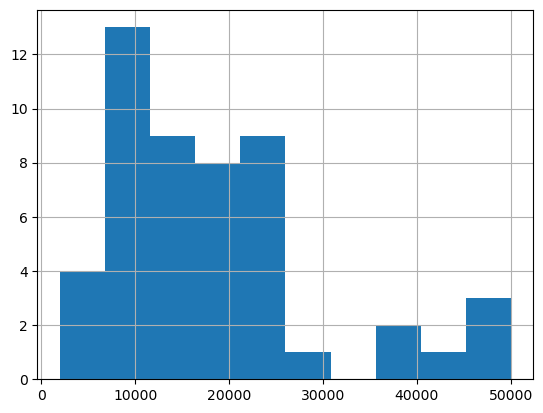

In [185]:
income_df.Mthly_HH_Expense.hist(bins=10)

print(f"""Ik zou de median({med_exp}) gebruiken.
De gemiddelde({avg_exp}) is hoger vanwege de hoge waarden rond 40k-50k en dat geeft geen goed volledig beeld.""")

### Vraag 4: Wat is de maandelijke uitgaven voor de meeste huishoudens?

In [191]:
mode_exp = income_df.Mthly_HH_Expense.mode()
print(f"\nDe maandelijke uitgaven voor de meeste huishoudens is [{mode_exp[0]}].\n")
income_df.Mthly_HH_Expense.describe()


De maandelijke uitgaven voor de meeste huishoudens is [25000].



count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

### Vraag 5: Hoe ziet de frequentieverdeling er uit voor de maandelijkse uitgaven? Welk inzicht geeft dit jou?

<AxesSubplot:>

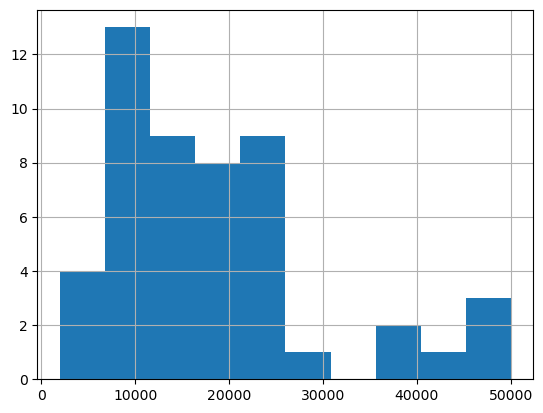

In [195]:
income_df.Mthly_HH_Expense.hist(bins=10)
# Verspreid data


### Vraag 6: Bereken de interkwartielafstand voor de maandelijkse uitgaven.

In [198]:
print(np.quantile(income_df.Mthly_HH_Expense, [0.25, 0.75]))
print(np.quantile(income_df.Mthly_HH_Expense,[0.75]) - np.quantile(income_df.Mthly_HH_Expense, [0.25]))

[10000. 25000.]
[15000.]


### Vraag 7: Bereken de variantie en standaard deviatie van elke numerieke kolom.

In [196]:
len(income_df["Mthly_HH_Expense"])
income_df.mean(numeric_only=True)


Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

In [176]:
print(f"Standart deviation for the columns are \n\n{income_df.std(numeric_only=True)}\n")
print(income_df.describe())


# test = income_df[:] - income_df.mean
# income_df.std(numeric_only=True)
# income_df.mean(numeric_only_True)
# col_length = len(income_df["Mthly_HH_Expense"])
# col_mean = col_sum / col_length 


# def calculate_std(column):
#     count = 0
#     for i in income_df:
#         count +=1
#         if isinstance(income_df[column][count], int):
#             return income_df[column].std

# calculate_std("Mthly_HH_Expense")  

# income_df["Mthly_HH_Expense"]

# def real(column):
#     for i in income_df[str(column)]:
#         if isinstance(income_df[str(column)].dtype, int):
#             return income_df[str(column)].std
#         else:
#             print("Calculation is possible only only numeric value columns")

# real("Mthly_HH_Income")

Standart deviation for the columns are 

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

       Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
count        50.000000         50.000000          50.000000        50.000000   
mean      41558.000000      18818.000000           4.060000      3060.000000   
std       26097.908979      12090.216824           1.517382      6241.434948   
min        5000.000000       2000.000000           1.000000         0.000000   
25%       23550.000000      10000.000000           3.000000         0.000000   
50%       35000.000000      15500.000000           4.000000         0.000000   
75%       50375.000000      25000.000000           5.000000      3500.000000   
max      100000.000000      50000.000000           7.000000     35000

### Vraag 8: Bereken het 10e en de 90e percentiel van het maandelijkse inkomen. Wat is de spreidingsbreedte?

[13850. 85500.]
Spreidingsbreedte is 95000 tussen range max = 100000 and min = 5000


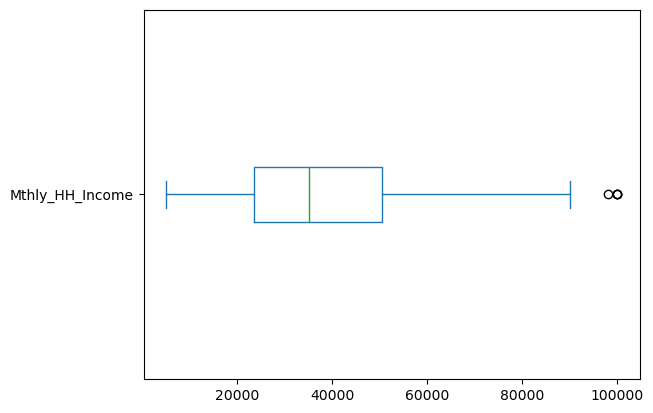

In [199]:
print(np.quantile(income_df.Mthly_HH_Income, [0.1, 0.9]))
income_df.Mthly_HH_Income.plot.box(vert=False)

range_income = max(income_df.Mthly_HH_Income) - min(income_df.Mthly_HH_Income)
print(f"Spreidingsbreedte is {range_income} tussen range max = {max(income_df.Mthly_HH_Income)} and min = {min(income_df.Mthly_HH_Income)}")

### Vraag 9: Wat is de Pearson correlatie coëfficiënt van het maandelijkse inkomen en de uitgaven? Is dit wat je zou verwachten, waarom wel/niet?

In [187]:
## Typ hier je code
income_df[["Mthly_HH_Income", "Mthly_HH_Expense"]].corr()

,Mthly_HH_Income,Mthly_HH_Expense
Mthly_HH_Income,1.000000,0.649215
Mthly_HH_Expense,0.649215,1.000000


<AxesSubplot:xlabel='Mthly_HH_Income', ylabel='Mthly_HH_Expense'>

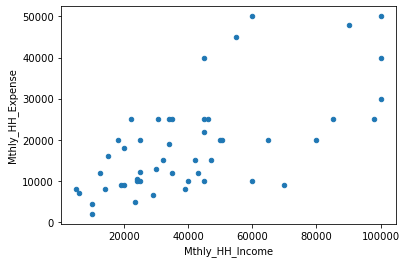

In [194]:
income_df.plot.scatter(x="Mthly_HH_Income",y="Mthly_HH_Expense")